### Chapter 12

# **RNN 모델 기본 원리**

> ## 학습 목표

- RNN(순환 신경망)의 기본 원리를 이해하고, 데이터의 시퀀스 처리와 시간적 종속성을 모델링하는 방법을 설명할 수 있다.
- 다양한 RNN 구조 및 동작 방식을 비교 분석하고, 특히 LSTM(Long Short-Term Memory)과 GRU(Gated Recurrent Unit)의 개념과 구조적 특성을 명확히 파악할 수 있다.
- LSTM의 구성 요소(셀 상태, 게이트 메커니즘 등)에 대한 심층적인 이해를 통해, 장기 기억 문제를 해결할 수 있다. 
- PyTorch를 활용하여 RNN 및 LSTM 모델을 구현하고, 기본적인 하이퍼파라미터 조정 및 성능 평가를 수행할 수 있다.

## 12.1 RNN(순환 신경망, Recurrent Neural Network) 원리

- RNN은 **순차적 데이터(Sequence Data)** 를 처리하는 데 적합한 신경망입니다. 
- 주로 시간적 연속성이 있는 데이터를 다루며, 자연어 처리(NLP), 음성 인식, 시계열 예측 등에서 널리 사용됩니다. 
- RNN은 일반적인 신경망과 달리 순차적 데이터를 입력받아 이전의 출력을 다음 입력에 반영하는 구조를 가집니다.

### 1) RNN의 기본 원리:

- **순차적 처리** : RNN은 이전 타임스텝의 출력을 현재 타임스텝의 입력으로 사용하는 방식입니다. 이로 인해 순차적인 정보가 모델에 전달됩니다.
- **셀 상태(State)** : RNN은 각 타임스텝마다 은닉 상태(hidden state)를 업데이트하며, 이를 통해 모델은 과거의 정보를 기억합니다.
- **기울기 소실 문제(Vanishing Gradient Problem)** : RNN은 긴 시퀀스를 다룰 때 기울기 소실 문제로 인해 학습이 어려운 경우가 많습니다. 

   이를 해결하기 위한 개선된 모델로 LSTM(Long Short-Term Memory)과 GRU(Gated Recurrent Unit)가 있습니다.

- RNN은 현재 입력 x와 그 이전의 상태 h를 사용하여 현재 은닉 상태를 계산한다.

<img src="./image/12.1_RNN 은닉상태.png" width="800"/>
<figcaption>그림 12.1_RNN 은닉상태</figcaption>

<img src="./image/12.2_RNN 순환구조.png" width="700"/>
<figcaption>그림 12.2_RNN 순환구조</figcaption>

### 2) RNN의 한계

RNN은 시퀀스를 처리하는 데 매우 효과적이지만 다음과 같은 한계를 가지고 있습니다:

-   **Vanishing Gradient Problem**: 장기 의존성을 학습하는 데 어려움을 겪는 현상으로, 기울기가 매우 작아져(사라져서) 학습이 진행되지 않거나 느려지는 문제가 발생합니다. 

    이는 긴 시퀀스 또는 시간적 간격의 데이터 처리 시 특히 문제됩니다.
    
-   **Long-Term Dependencies**: 일반적인 RNN은 장기적인 의존성 정보를 잘 포착하지 못합니다.

### 3) LSTM(Long Short-Term Memory)

이러한 한계를 극복하기 위해 LSTM이 고안되었습니다. LSTM은 RNN의 특별한 형태로, 다음과 같은 구성 요소를 포함합니다:

-   **셀 상태(Cell State)**: 데이터를 장기적으로 기억할 수 있는 연속적 정보의 흐름을 제공합니다.
-   **게이트(Gates)**: LSTM은 입력 게이트, 삭제 게이트, 출력 게이트의 세 가지 게이트를 사용하여 정보를 조절합니다. 각각의 게이트는 다음과 같은 역할을 수행합니다:
    -   **입력 게이트**: 새로운 정보가 셀 상태에 추가되어야 하는지를 결정합니다.
    -   **삭제 게이트**: 셀 상태에서 어떤 정보를 삭제해야 할지를 결정합니다.
    -   **출력 게이트**: 셀 상태에서 어떤 정보를 출력할지를 결정합니다.

- RNN과 LSTM은 시퀀스 데이터를 모델링하는 데 매우 유용한 도구입니다. 
- RNN의 기본 원리를 이해하고, LSTM과 같은 발전된 모델의 구조와 작동 방식을 이해하면 시계열 데이터 또는 자연어 처리와 같은 복잡한 문제를 해결하는 데 큰 도움이 됩니다. 
- PyTorch를 이용한 이러한 모델의 구현은 직관적이며, 특히 RNN과 LSTM의 이점을 활용하는 데 유용합니다.

## 12.2 RNN 모델 구현

In [3]:
import torch   
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms 
#torchvision: PyTorch에서 컴퓨터 비전용 데이터셋, 모델 등을 제공.

### 데이터셋 준비

- datasets.MNIST: train=True는 훈련 데이터셋, train=False는 테스트 데이터셋을 로드합니다.
- transforms.ToTensor(): 이미지를 텐서로 변환합니다.
- DataLoader: 데이터를 미니배치로 나누어 학습에 사용할 수 있게 합니다.

In [4]:
# 데이터 전처리 설정
transform = transforms.Compose([
    transforms.ToTensor(),  
    # 이미지를 텐서로 변환 
    # transforms.ToTensor(): PIL 이미지나 NumPy 배열을 PyTorch 텐서로 변환.
    transforms.Normalize((0.5,), (0.5,))  # 평균과 표준편차로 정규화 
])

# 데이터셋 로딩
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 데이터 로더 설정
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


### RNN 모델 정의

In [5]:
# 2. RNN 모델 정의
class RNN_Model(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(RNN_Model, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        rnn_out, _ = self.rnn(x)  # (batch_size, seq_len, hidden_size)
        out = rnn_out[:, -1, :]   # 마지막 타임스텝의 출력을 사용
        out = self.fc(out)        # FC 층을 통해 최종 출력
        return out
# 3. 모델 초기화
model = RNN_Model()

- nn.RNN: 기본 RNN 레이어입니다. input_size=28 (각 픽셀), hidden_size=128 (RNN의 은닉 상태 차원), batch_first=True는 입력 텐서의 첫 번째 차원이 배치 크기임을 나타냅니다.
- forward: rnn_out[:, -1, :]는 시퀀스의 마지막 타임스텝에서 나온 출력을 사용합니다. 이는 MNIST의 숫자가 하나의 시퀀스로 간주되어 각 픽셀을 하나의 타임스텝으로 처리하기 때문입니다.
- fc: RNN의 출력을 10개의 클래스(0~9)로 변환하는 완전 연결층입니다.

In [6]:
# 4. 손실 함수와 최적화 알고리즘
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

- 학습 과정에서는 각 배치에 대해 RNN 모델을 사용해 예측을 하고, CrossEntropyLoss를 사용해 손실을 계산합니다.
- optimizer.step()을 통해 파라미터를 업데이트합니다.
- 매 에폭마다 훈련 데이터에서 손실 값과 정확도를 출력합니다.

In [7]:
# 5. 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.squeeze(1), labels  # (batch_size, 28, 28)
        inputs = inputs.view(-1, 28, 28)  # (batch_size, seq_len=28, input_size=28)
        
        optimizer.zero_grad()
        outputs = model(inputs)  # RNN 모델을 통해 출력값 계산
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}, Accuracy: {100 * correct / total}%")

Epoch [1/5], Loss: 0.7309608231030548, Accuracy: 75.72166666666666%
Epoch [2/5], Loss: 0.30280255606131895, Accuracy: 91.49%
Epoch [3/5], Loss: 0.22320897540431034, Accuracy: 93.71%
Epoch [4/5], Loss: 0.18912108946464526, Accuracy: 94.66833333333334%
Epoch [5/5], Loss: 0.16951021099431332, Accuracy: 95.27833333333334%


In [8]:
# 6. 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.squeeze(1), labels
        inputs = inputs.view(-1, 28, 28)  # (batch_size, seq_len=28, input_size=28)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total}%")

# model.eval()은 평가 모드로 설정하여 dropout 같은 레이어를 비활성화합니다.
# 테스트 데이터에 대해 예측을 수행하고 정확도를 계산합니다.

Test Accuracy: 94.56%


### 예측 결과 시각화 

**생각해 보기**
1. NumPy 배열을 PyTorch 텐서로 변환: img가 numpy.ndarray이므로, 이를 torch.tensor(img).float()로 변환하여 PyTorch 텐서로 만듭니다. float()는 텐서의 타입을 float32로 변환하는 것입니다. 만약 MNIST 이미지가 이미 torch.Tensor라면 이 변환은 필요 없습니다.
2. unsqueeze() 사용: img_tensor.unsqueeze(0)를 사용하여 배치 차원을 추가합니다. unsqueeze(0)은 텐서 앞에 하나의 차원을 추가하여 (1, 28, 28) 형태로 만듭니다. 이렇게 해야 RNN 모델에 입력으로 사용할 수 있습니다.
3. img 시각화: plt.imshow(img, cmap='gray')를 사용하여 이미지를 시각화합니다. img는 이미 (28, 28) 크기이므로 이 부분은 numpy 배열을 그대로 사용합니다.  

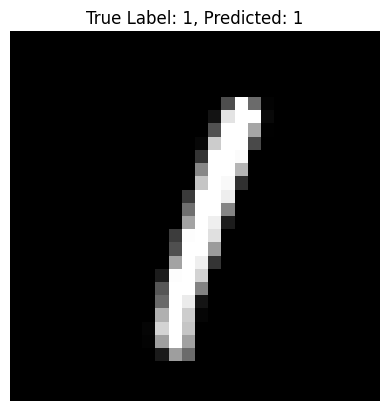

In [9]:
# 7. 예측 결과 시각화
import torch
import random
import matplotlib.pyplot as plt

# 테스트 데이터에서 랜덤 샘플을 선택
model.eval()
images, labels = next(iter(test_loader))
random_idx = random.randint(0, len(images) - 1)

# 랜덤 이미지와 레이블
img = images[random_idx]
label = labels[random_idx]

# 이미지를 원본 형태로 변환 (채널 순서 바꾸기, MNIST는 (1,28,28))
img = img.squeeze(0).numpy()  # (28, 28)

# NumPy 배열을 PyTorch 텐서로 변환
# img는 numpy.ndarray이므로 이를 torch.tensor(img)로 변환하고 float()로 형 변환합니다.
img_tensor = torch.tensor(img).float()

# 모델 예측
# unsqueeze() 메서드는 PyTorch 텐서에만 존재하므로, numpy.ndarray를 PyTorch 텐서로 변환한 후 unsqueeze()를 사용해야 합니다.
output = model(img_tensor.unsqueeze(0))  # unsqueeze로 배치 차원 추가, (1, 28, 28)
_, predicted_label = torch.max(output, 1)

# 예측 결과 시각화
plt.imshow(img, cmap='gray')
plt.title(f"True Label: {label}, Predicted: {predicted_label.item()}")
plt.axis('off')
plt.show()

## 12.3 LSTM(Long Short-Term Memory)

**LSTM(Long Short-Term Memory)** 는 순환 신경망(RNN : Recurrent Neural Network)의 일종으로, **장기적인 의존 관계(장기적인 종속성 : long-term dependencies)** 를 더 잘 처리할 수 있도록 설계된 아키텍처입니다. 기존의 RNN의 발전형으로 장기 기억 문제(long-term dependencies 문제)와 기울기 소실(vanishing gradient) 문제를 해결하기 위해 고안된 것입니다. LSTM은 1997년 Sepp Hochreiter와 Jürgen Schmidhuber에 의해 처음 제안되었습니다.

**1) LSTM(Long Short-Term Memory) 구성 요소**

-   **셀 상태 (Cell State)**:
    
    -   장기 메모리 역할을 하며, 시퀀스 데이터를 처리하는 동안 정보를 전송합니다.
    -   셀 상태는 시퀀스의 모든 타임 스텝에서 정보를 유지하고 업데이트할 수 있어, 장기 의존성을 잘 처리할 수 있도록 도와줍니다.
    
-   **입력 게이트 (Input Gate)**:
    
    -   현재 입력 정보를 셀 상태에 얼마나 추가할지를 결정합니다.
    -   이 게이트는 현재 입력 xtx\_txt와 이전 은닉 상태 ht−1h\_{t-1}ht−1에 기반하여 새로운 정보를 얼마나 반영할 것인지를 학습하며, 이를 통해 새로운 정보가 셀 상태에 추가됩니다.
    
-   **망각 게이트 (Forget Gate)**:
    
    -   이전 셀 상태에서 어떤 정보를 삭제할지를 결정합니다.
    -   이 게이트는 이전 은닉 상태와 현재 입력을 기반으로 작동하여, 불필요한 정보를 선택적으로 잃어버리는데 도움을 줍니다. 이를 통해 모델은 유용한 정보만 유지할 수 있습니다.
    
-   **출력 게이트 (Output Gate)**:
    
    -   최종 출력을 계산할 때 셀 상태를 얼마나 반영할지를 결정합니다.
    -   LSTM의 출력은 셀 상태와 이 게이트의 조합으로 만들어지며, 출력을 결정할 때 현재 셀 상태의 정보를 얼마나 반영할지를 조절합니다. 이 과정에서 시퀀스의 의미 있는 정보를 다음 단계로 전달합니다.

**2) LSTM의 동작 과정**

LSTM의 각 타임 스텝에서는 위에서 정의한 게이트를 사용하여 다음과 같은 과정을 따릅니다:

  -  **입력 게이트**는 현재 입력 및 이전 은닉 상태에 기반하여 새로운 데이터를 셀 상태에 얼마나 반영할지 결정합니다.
  -  **삭제 게이트**는 이전 셀 상태에서 어떤 정보를 잃어버릴지를 결정합니다.
  -  **셀 상태**는 새로 입력된 정보와 이전 상태 정보를 결합하여 업데이트됩니다.
  -  **출력 게이트**는 업데이트된 셀 상태를 기반으로 출력할 정보를 결정합니다.

**3) LSTM의 주요 장점**

  -   **장기 의존성 문제 해결**: LSTM은 긴 시퀀스를 처리할 수 있는 능력이 뛰어나며, 정보를 오랜 시간 동안 유지할 수 있습니다.
  -   **기울기 소실 문제 완화**: LSTM의 구조는 기울기 소실 문제를 완화하여 좀 더 안정적인 학습을 가능하게 합니다.
  -   **유연성**: LSTM은 텍스트, 음성 인식, 시계열 데이터 분석 등 다양한 시퀀스 데이터에 널리 적용됩니다.

**4) LSTM의 사용 예**

RNN 또는 LSTM은 다음과 같은 다양한 분야에서 많이 사용됩니다:

  -   **자연어 처리 (NLP)**: 문장의 문맥을 이해하고 다음 단어를 예측하는 데 사용됩니다.
  -   **음성 인식**: 주어진 음성 데이터를 텍스트로 변환하는 모델에서 사용됩니다.
  -   **시계열 예측**: 주식 시장 예측과 같은 연속적인 데이터를 분석할 때도 사용됩니다.

> ## LSTM을 이용한 예제 : MNIST 숫자 분류
- 모델 정의 생각해 보기
- 입력 크기: MNIST 이미지의 각 행은 28개의 픽셀로 구성되어 있으므로, 각 입력 벡터의 크기는 28입니다.
- LSTM 층: LSTM은 input_size=28과 hidden_size=128로 설정됩니다. batch_first=True는 입력 텐서의 차원이 (batch_size, seq_len, input_size)임을 의미합니다.
- Fully Connected Layer: LSTM의 출력을 입력받아 최종 10개의 클래스 중 하나를 예측합니다.

### **1) 라이브러리 임포트 및 데이터 로드**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 변환 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNIST 데이터셋 로드
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

### **2) LSTM 모델 정의**

In [3]:
# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), 28, 28)  # (batch_size, seq_len, input_size)
        out, _ = self.lstm(x)  # LSTM 처리
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스의 출력
        return out

### **3) 손실 함수 및 옵티마이저 설정**

In [4]:
# 모델, 손실 함수 및 옵티마이저 설정
model = LSTMModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### **4) 훈련 및 평가 함수 정의**

In [5]:
# 손실과 정확도를 기록할 리스트 초기화
train_losses = []
test_losses = []
accuracies = []

# 훈련 및 평가 함수 정의
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)  # 예측
        loss = criterion(output, target)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        
        total_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}'
                  f' ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    return total_loss / len(train_loader)  # 평균 손실 반환


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)  
            # 배치 손실 합산
            
            pred = output.argmax(dim=1, keepdim=True)  
            # 가장 높은 값을 가진 클래스 선택
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)  # 평균 손실 계산
    accuracy = 100. * correct / len(test_loader.dataset)  # 정확도 계산
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)}'
        f' ({accuracy:.2f}%)\n')

    return test_loss, accuracy  # 손실과 정확도 반환

### **5) 모델 훈련 실행**

In [11]:
# 모델 훈련 및 평가 실행
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss, accuracy = test(model, device, test_loader)
    
    # 손실과 정확도 기록
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.008584
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.020665
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.007917
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.006022
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.011045
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.012144
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.052949
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.004781
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.165372
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.004714
Test set: Average loss: 0.0625, Accuracy: 9819/10000 (98.19%)

Epoch [1/5], Train Loss: 0.0429, Test Loss: 0.0625, Test Accuracy: 98.19%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.029173
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.005182
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.051638
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.074329
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.020467
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.033143
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.063786
Train Epoch: 2 [44800/600

In [14]:
# 훈련 손실, 테스트 손실, 정확도 리스트 출력
print("\nTraining Losses:", train_losses)
print("Test Losses:", test_losses)
print("Accuracies:", accuracies)


Training Losses: [0.40858876297889807, 0.11432304285538158, 0.07902311789008902, 0.06108322806719905, 0.049811781433819015, 0.042922971979417066, 0.036040268529123114, 0.03513338076957771, 0.029546890406187243, 0.026531038014267854]
Test Losses: [0.14526244406700134, 0.09975937406867742, 0.08093605071287602, 0.07115933851450681, 0.06474941152855754, 0.062496584929339585, 0.05018961319364607, 0.04150759464004077, 0.04296628216942772, 0.03894225383689627]
Accuracies: [95.52, 97.2, 97.51, 97.72, 98.27, 98.19, 98.5, 98.77, 98.72, 98.8]


### **6) MNIST 데이터셋을 LSTM 모델로 학습한 후, 훈련 손실, 테스트 손실 및 정확도를 시각화**

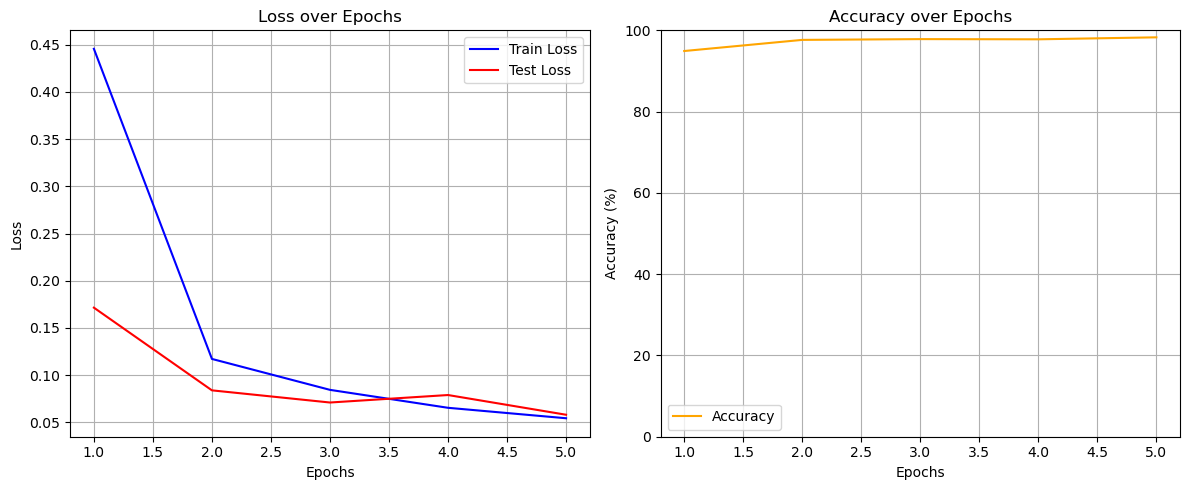

In [8]:
# 시각화 코드
# 결과 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Y축 범위 설정

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()  # 그래프 출력

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293075
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.846322
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.373665
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.354494
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.169325
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.103866
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.278645
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.109781
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.159611
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.173658
Test set: Average loss: 0.2001, Accuracy: 9423/10000 (94.23%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.167265
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.105447
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.079930
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.015542
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.065600
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.116929
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.119209
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.026792
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.077099

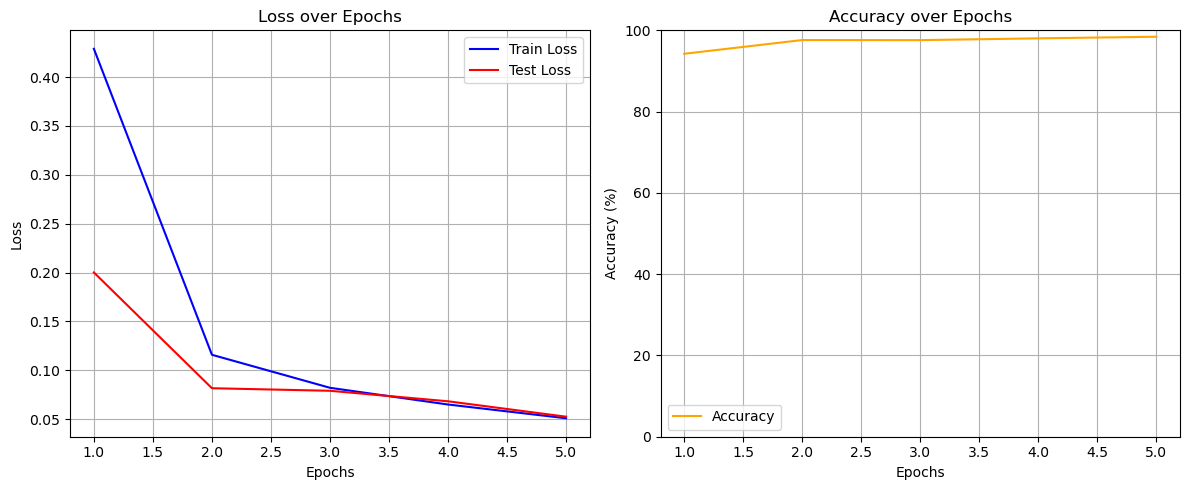

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 변환 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNIST 데이터셋 로드
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), 28, 28)  # (batch_size, seq_len, input_size)
        out, _ = self.lstm(x)  # LSTM 처리
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스의 출력
        return out

# 모델, 손실 함수 및 옵티마이저 설정
model = LSTMModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실과 정확도를 기록할 리스트 초기화
train_losses = []
test_losses = []
accuracies = []

# 훈련 및 평가 함수 정의
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)  # 예측
        loss = criterion(output, target)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        
        total_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}'
                  f' ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    average_loss = total_loss / len(train_loader)  # 평균 손실 반환
    return average_loss


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)  
            # 배치 손실 합산
            pred = output.argmax(dim=1, keepdim=True)  
            # 가장 높은 값을 가진 클래스 선택
            correct += pred.eq(target.view_as(pred)).sum().item()

    average_loss = test_loss / len(test_loader.dataset)  # 평균 손실 계산
    accuracy = 100. * correct / len(test_loader.dataset)  # 정확도 계산
    print(f'Test set: Average loss: {average_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)}'
        f' ({accuracy:.2f}%)\n')
    
    return average_loss, accuracy  # 손실과 정확도 반환

# 모델 훈련 및 평가 실행
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss, accuracy = test(model, device, test_loader)
    
    # 손실과 정확도 기록
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)
    
# 훈련 손실, 테스트 손실, 정확도 리스트 출력
print("\nTraining Losses:", train_losses)
print("Test Losses:", test_losses)
print("Accuracies:", accuracies)

# 시각화 코드
# 결과 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Y축 범위 설정

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()  # 그래프 출력

In [10]:
# 1. 모델 구현
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 데이터셋 로딩 및 전처리
# 데이터셋 로딩: datasets.MNIST를 사용하여 MNIST 데이터를 다운로드하고, transform을 통해 데이터를 텐서로 변환합니다.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# LSTM 모델 정의 
class LSTM_Model(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        
        # LSTM 층 정의
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Fully Connected Layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # LSTM의 입력은 (batch_size, seq_len, input_size)
        lstm_out, (hn, cn) = self.lstm(x)  # lstm_out: (batch_size, seq_len, hidden_size)
        
        # LSTM의 마지막 타임스텝 출력만 사용
        out = self.fc(lstm_out[:, -1, :])  # 마지막 타임스텝의 출력
        return out

# 모델, 손실 함수, 최적화 함수 정의
model = LSTM_Model(input_size=28, hidden_size=128, output_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

- 학습 과정에서 각 배치마다 순전파와 역전파를 진행합니다.
- optimizer.zero_grad()는 이전 그래디언트를 초기화하고, optimizer.step()으로 파라미터를 업데이트합니다.

In [11]:
# 2. 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.squeeze(1)  # (batch_size, 28, 28) 형태로 변경
        images = images.permute(0, 2, 1)  # (batch_size, 28, 28) -> (batch_size, seq_len=28, input_size=28)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # 에포크마다 손실과 정확도 출력
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():    # torch.no_grad()는 평가할 때 불필요한 그래디언트 계산을 방지합니다.
    for images, labels in test_loader:
        images = images.squeeze(1)
        images = images.permute(0, 2, 1)
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/5], Loss: 0.4183, Accuracy: 86.68%
Epoch [2/5], Loss: 0.1204, Accuracy: 96.44%
Epoch [3/5], Loss: 0.0828, Accuracy: 97.54%
Epoch [4/5], Loss: 0.0619, Accuracy: 98.14%
Epoch [5/5], Loss: 0.0507, Accuracy: 98.45%
Test Accuracy: 97.91%


### 모델 훈련 과정 시각화

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 데이터셋 로딩 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# LSTM 모델 정의 
class LSTM_Model(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        
        # LSTM 층 정의
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Fully Connected Layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # LSTM의 입력은 (batch_size, seq_len, input_size)
        lstm_out, (hn, cn) = self.lstm(x)  # lstm_out: (batch_size, seq_len, hidden_size)
        
        # LSTM의 마지막 타임스텝 출력만 사용
        out = self.fc(lstm_out[:, -1, :])  # 마지막 타임스텝의 출력
        return out

# 모델, 손실 함수, 최적화 함수 정의
model = LSTM_Model(input_size=28, hidden_size=128, output_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [13]:
# 학습 루프
num_epochs = 5        # 훈련할 에폭(epoch) 수
train_losses = []     # 각 에폭마다의 훈련 손실을 저장할 리스트
train_accuracies = [] # 각 에폭마다의 훈련 정확도를 저장할 리스트
test_accuracies = []  # 각 에폭마다의 테스트 정확도를 저장할 리스트

# 에폭 수만큼 반복
for epoch in range(num_epochs):
    model.train()    # 모델을 훈련 모드로 설정 (드롭아웃, 배치 정규화 등 활성화)
    running_loss = 0.0     # 현재 에폭에서의 손실을 누적할 변수
    correct = 0            # 정확한 예측의 수를 세기 위한 변수
    total = 0              # 전체 예측의 수를 세기 위한 변수
    
    for images, labels in train_loader:
        images = images.squeeze(1)        # (batch_size, 28, 28) 형태로 변경
        images = images.permute(0, 2, 1)  
        # (batch_size, 28, 28) -> (batch_size, seq_len=28, input_size=28)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    # Epoch마다 loss와 accuracy 출력
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")
    
    # 모델 평가 (테스트 정확도 계산)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.squeeze(1)
            images = images.permute(0, 2, 1)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # 전체 테스트 데이터에 대해 모델의 정확도를 계산 (백분율로 표현)
    # 계산된 테스트 정확도를 test_accuracies 리스트에 추가
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/5], Loss: 0.4469, Accuracy: 85.77%
Test Accuracy: 94.43%
Epoch [2/5], Loss: 0.1207, Accuracy: 96.46%
Test Accuracy: 97.07%
Epoch [3/5], Loss: 0.0805, Accuracy: 97.58%
Test Accuracy: 96.80%
Epoch [4/5], Loss: 0.0627, Accuracy: 98.13%
Test Accuracy: 98.22%
Epoch [5/5], Loss: 0.0522, Accuracy: 98.47%
Test Accuracy: 98.03%


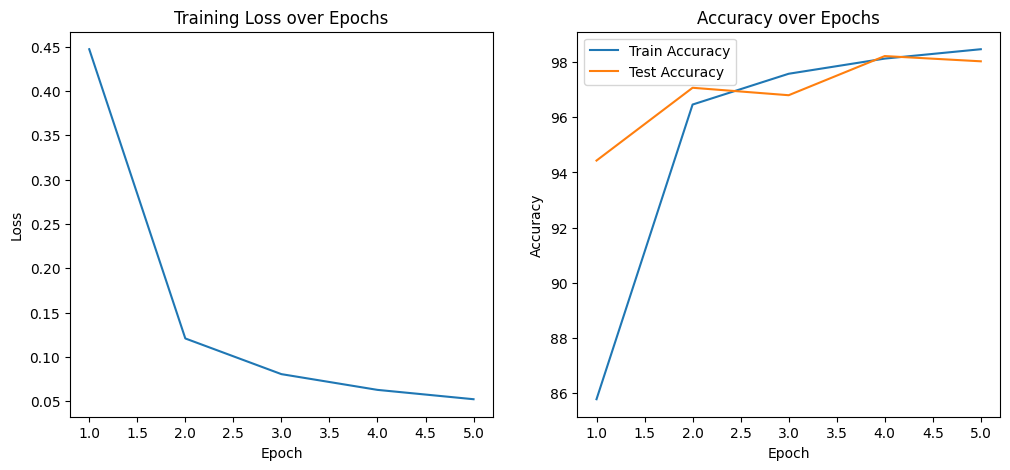

In [14]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.show()

- 그래프를 보면 Loss는 점점 줄어들고, Test 정확도는 Train 정확도 보다 낮게 표시되었다.

-----

# `Simple CNN Classifying Fashion MNIST`

* Simple Convolutional Neural Network (CNN) with 3 convolutions and 4 fully connected layers working to classify clothing from Fashion MNIST;
* Dataset with 70,000 instances and 784 pixel columns. 60,000 for training, 10,000 for testing;
* Every image is in grayscale, 28x28 and belong to one of the 10 clothing classes:
  * Class 0 => T-shirt
  * Class 1 => Trouser
  * Class 2 => Pullover
  * Class 3 => Dress
  * Class 4 => Coat
  * Class 5 => Sandal
  * Class 6 => Shirt
  * Class 7 => Sneaker
  * Class 8 => Bag
  * Class 9 => Ankle boot
* CNN is trained from scratch. No transfer learning is performed;
* Dataset version on Kaggle: [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist).

# 간단한 CNN으로 패션 MNIST 분류하기

-   3개의 합성곱 층과 4개의 완전 연결 층으로 구성된 간단한 합성곱 신경망(CNN)으로 패션 MNIST에서 의류를 분류합니다.
-   데이터셋은 70,000개의 인스턴스와 784개의 픽셀 열로 구성되어 있습니다. 이 중 60,000개는 훈련용, 10,000개는 테스트용입니다.
-   모든 이미지는 그레이스케일이며 크기는 28x28이며 10개의 의류 클래스 중 하나에 속합니다:
    
    -   클래스 0 => 티셔츠
    -   클래스 1 => 바지
    -   클래스 2 => 풀오버
    -   클래스 3 => 드레스
    -   클래스 4 => 코트
    -   클래스 5 => 샌달
    -   클래스 6 => 셔츠
    -   클래스 7 => 스니커즈
    -   클래스 8 => 가방
    -   클래스 9 => 앵클 부츠
    
-   CNN은 처음부터 훈련됩니다. 전이 학습은 수행되지 않습니다.
-   데이터셋 버전은 Kaggle에서 제공하는 [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)입니다.

## Data Exploration

Let us load the libraries we are going to use in our notebook and also the dataset to display it and get a grasp of the data.

The data is in the usual grayscale image numeric representation: one column per pixel and each value representing the gray color intensity. Color intensity ranges from 0 (completely black) to 255 (completely white).

데이터 탐색

우리가 노트북에서 사용할 라이브러리와 데이터를 로드하여 데이터를 표시하고 이해해 보겠습니다.

데이터는 일반적인 그레이스케일 이미지 수치 표현 방식으로, 각 픽셀당 하나의 열이 있으며 각 값은 회색의 색상 강도를 나타냅니다. 색상 강도 범위는 0(완전히 검은색)에서 255(완전히 흰색)입니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import zipfile 
import os

# Extract training set from FashionMNIST dataset.
zip_object = zipfile.ZipFile('data/raw/fashion-mnist-train.zip')
zip_object.extractall('data/raw/')
zip_object.close()

# Extract testing set from FashionMNIST dataset.
zip_object = zipfile.ZipFile('data/raw/fashion-mnist-test.zip')
zip_object.extractall('data/raw/')
zip_object.close()


In [3]:
fashion_train_df = pd.read_csv('data/raw/fashion-mnist-train.csv')
fashion_test_df = pd.read_csv('data/raw/fashion-mnist-test.csv')

display(fashion_train_df)
display(fashion_test_df)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Pandas' `info` and `describe` will not tell us much on this dataset.

`info` basically only tells dataset dimensions and memory usage, which is important to evaluate on image datasets as they can be very large. Fashion MNIST only uses 359 MB; any decent machine can work on it fairly easy.

Meanwhile, `describe` presents descriptive statistics on the data. The only useful information here are the mean (or min and max) values for each pixel column, telling us that the object in the image is centered by default.  We can say that because border pixels have mean values close to 0 and center pixels have mean values far from 0.

Pandas의 info와 describe는 이 데이터셋에 대해 많은 정보를 제공하지 않을 것입니다.

info는 기본적으로 데이터셋의 차원과 메모리 사용량만 알려주며, 이는 이미지 데이터셋에서 중요한 평가 요소입니다. Fashion MNIST의 경우 크기는 359 MB로, 어느 정도 성능이 좋은 머신이라면 비교적 쉽게 작업할 수 있습니다.

한편, describe는 데이터에 대한 기술 통계를 제공합니다. 여기서 유용한 정보는 각 픽셀 열에 대한 평균(또는 최소 및 최대) 값인데, 이는 이미지의 객체가 기본적으로 중앙에 위치한다는 것을 나타냅니다. 이는 가장자리 픽셀의 평균 값이 0에 가까운 반면, 중앙 픽셀의 평균 값은 0에서 멀리 떨어져 있다는 사실로 확인할 수 있습니다.

In [25]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [26]:
fashion_train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Nonetheless, numeric information will not help much on visual datasets, so we build a grid with random images from the dataset. Image labels are printed above the subfigures.

We normalize our images to have their pixel values in the [0, 1] range. In this manner, any classifier can update its gradient faster and, therefore, converge faster.

그럼에도 불구하고 숫자 정보는 시각적 데이터셋에서는 큰 도움이 되지 않으므로, 데이터셋에서 무작위 이미지를 사용하여 그리드를 만듭니다. 이미지의 레이블은 서브피겨 위에 표시됩니다.

이미지를 [0, 1] 범위로 정규화하여 픽셀 값이 이 범위 안에 있도록 합니다. 이러한 방식으로 모든 분류기는 기울기를 더 빨리 업데이트할 수 있으며, 따라서 더 빠르게 수렴할 수 있습니다.

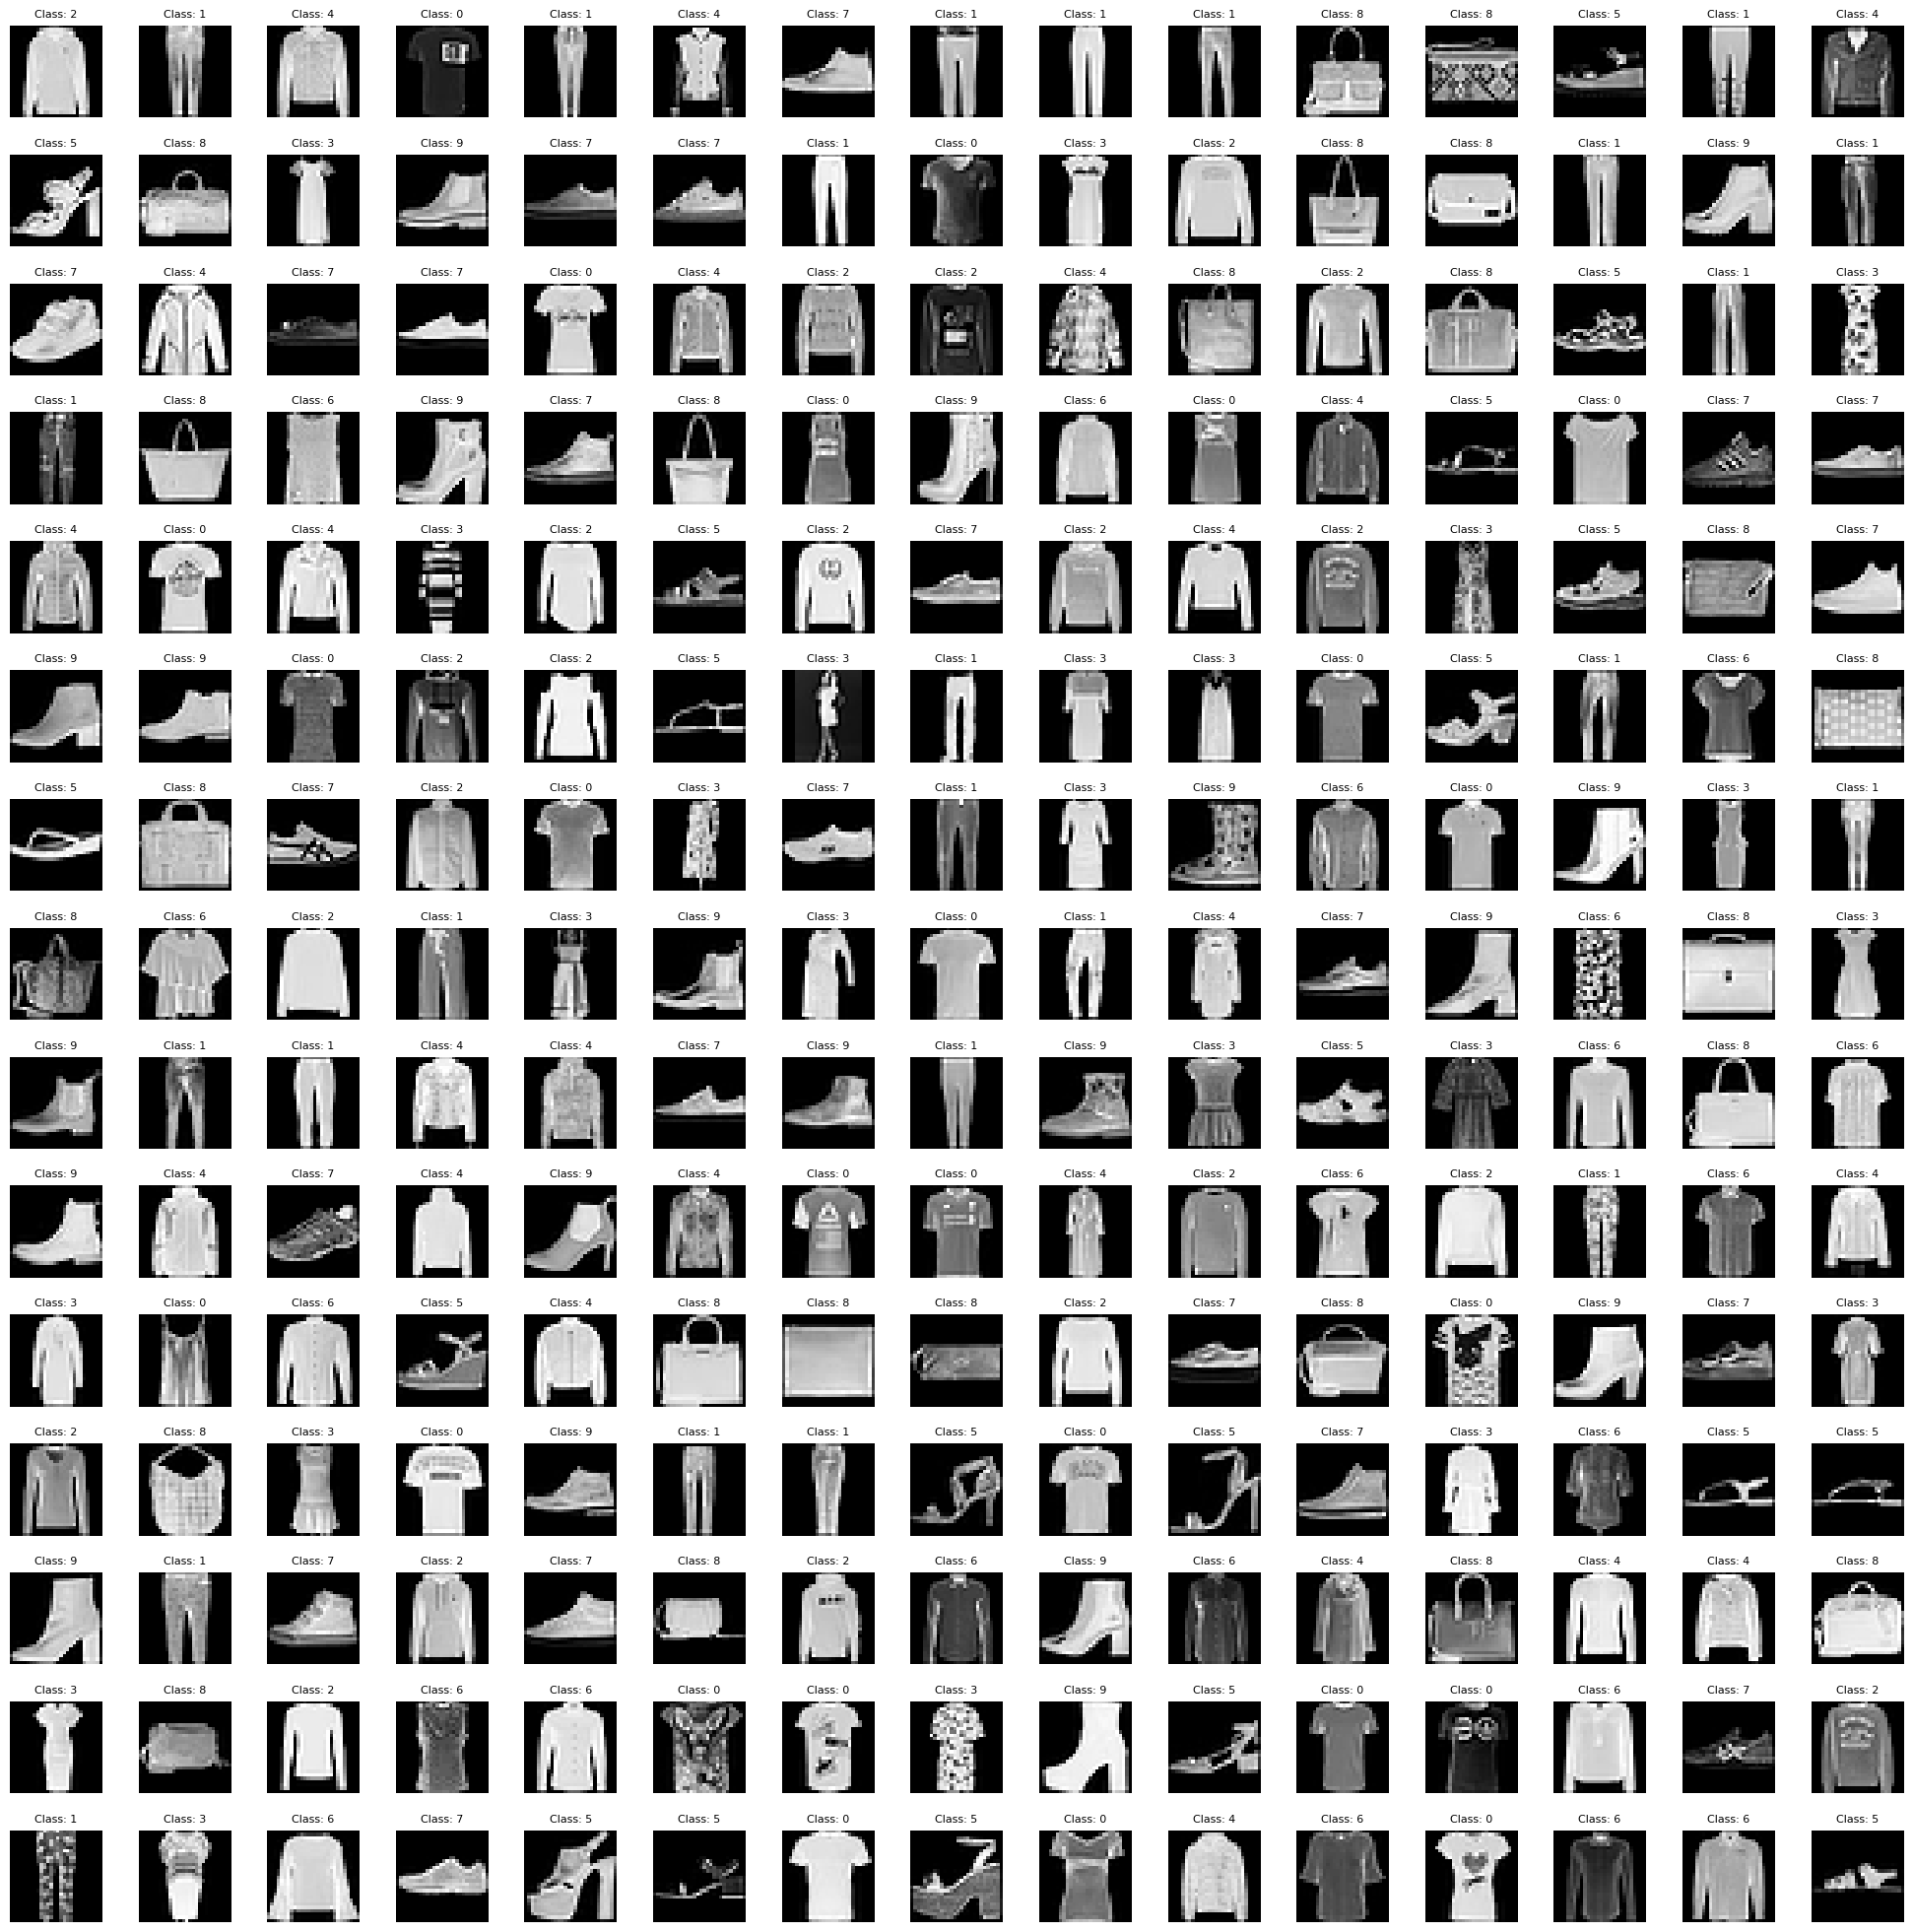

In [27]:
# Get values from Pandas dataframe to plot with matplotlib.
fashion_train = fashion_train_df.values
fashion_test = fashion_test_df.values

# Dimensions of the image grid.
grid_width = 15
grid_height = 15

fig, axes = plt.subplots(grid_height, grid_width, figsize=(25, 25))
axes = axes.ravel()

for i in np.arange(0, grid_height * grid_width):
    # Draft random index to get random image.
    index = np.random.randint(0, fashion_train.shape[0])
    axes[i].imshow(fashion_train[index, 1:].reshape(28, 28), cmap='gray')
    # Show image class label above the drafted image.
    axes[i].set_title("Class: " + str(fashion_train[index, 0]), fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [28]:
# Normalize each pixel intensity to be in the [0, 1] range.
X_train = fashion_train[:, 1:] / 255

# Reshape the 784 pixel columns to 28x28, in a single channel.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
y_train = fashion_train[:, 0]

X_test = fashion_test[:, 1:] / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = fashion_test[:, 0]

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Model Building and Training

Our model is a simple one with only a single stream of layers. We can use the `Sequential` framework from the TensorFlow API to build such a model.

We use 3 convolutional layers and 4 fully connected ones. The first convolutional has 32 feature maps and the remaining have 64. Every convolutional layer has a 3x3 kernel.

We define each fully connected layer to have its number of neurons approximately equal to half the number of input features. Therefore, since the flatten layer returns 576 features, the first fully connected uses 250, the second uses 125 and the penultimate uses 60. The last fully connected layer uses 10 neurons because we have 10 classes.

We add max pooling layers between each convolutional, except for the last one. Max pooling is used instead of average pooling because the edges of the objects, which max pooling identifies better, have more useful information than the contrast of the objects.

All layers use ReLU as activation function, except for the last layer that uses softmax.

모델 구축 및 교육

우리의 모델은 단일 스트림 레이어로 구성된 간단한 모델입니다. TensorFlow API의 Sequential 프레임워크를 사용하여 이러한 모델을 구축할 수 있습니다.

3개의 합성곱(convolutional) 레이어와 4개의 완전 연결(fully connected) 레이어를 사용합니다. 첫 번째 합성곱 레이어는 32개의 특징 맵(feature maps)을 가지고 있으며, 나머지 레이어는 64개를 사용합니다. 각 합성곱 레이어는 3x3 커널을 갖습니다.

각 완전 연결 레이어는 입력 특징의 수의 약 절반에 해당하는 뉴런 수를 갖도록 정의합니다. 따라서 플 Flatten 레이어가 576개의 특징을 반환하므로, 첫 번째 완전 연결 레이어는 250개, 두 번째 레이어는 125개, 그 이전 레이어는 60개 뉴런을 사용합니다. 마지막 완전 연결 레이어는 10개의 클래스를 가지고 있기 때문에 10개의 뉴런을 사용합니다.

모든 합성곱 레이어 사이에 최대 풀링(max pooling) 레이어를 추가하며, 마지막 레이어는 제외합니다. 최대 풀링은 평균 풀링보다 객체의 가장자리를 더 잘 식별하므로, 객체의 컨트라스트보다 더 유용한 정보를 제공합니다.

모든 레이어는 ReLU를 활성화 함수로 사용하며, 마지막 레이어는 softmax를 사용합니다.

In [32]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(layers.Flatten())

# Each fully connected has half its input as its number of neurons.
cnn_model.add(layers.Dense(250, activation='relu'))
cnn_model.add(layers.Dense(125, activation='relu'))
cnn_model.add(layers.Dense(60, activation='relu'))

# 10 neurons in the last layer as we have 10 classes.
cnn_model.add(layers.Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 250)            │       144,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 60)             │         7,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,539 (935.70 KB)

 Trainable params: 239,539 (935.70 KB)

 Non-trainable params: 0 (0.00 B)

For training, we empirically defined 20 batches with 3000 images each. We also set an early stopping callback that waits for 10 iterations without improvement before being triggered.

500 epochs are more than enough to let our early stopping callback perform its work.

Our validation set has 15% the size of the training set. Close to the testing set that has 10,000 images (nearly 15% of the 60,000 training images).

훈련을 위해 20개의 배치(batch)를 정의하였고, 각 배치에는 3000개의 이미지가 포함되어 있습니다. 또한 개선이 없는 10회의 반복을 기다린 후에 트리거되는 조기 종료(early stopping) 콜백을 설정했습니다.

500 에폭(epoch)은 우리의 조기 종료 콜백이 작동하기에 충분한 양입니다.

우리의 검증 세트는 훈련 세트 크기의 15%를 차지합니다. 테스트 세트는 10,000개의 이미지를 포함하고 있으며(60,000개의 훈련 이미지의 거의 15%에 해당), 검증 세트와 비슷한 규모입니다.

In [34]:
early_stopping_callback = callbacks.EarlyStopping(patience=10)
batch_size = X_train.shape[0] // 20

# 모델을 컴파일할 때, metrics를 리스트로 변경
cnn_model.compile(optimizer='Adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])  # metrics을 리스트로 수정

epochs_info = cnn_model.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=500,
                            callbacks=[early_stopping_callback],
                            validation_split=0.15)

Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.2919 - loss: 2.1281 - val_accuracy: 0.5938 - val_loss: 1.0868
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.6127 - loss: 1.0385 - val_accuracy: 0.6734 - val_loss: 0.8331
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 413ms/step - accuracy: 0.7140 - loss: 0.7738 - val_accuracy: 0.7373 - val_loss: 0.6929
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 434ms/step - accuracy: 0.7532 - loss: 0.6522 - val_accuracy: 0.7687 - val_loss: 0.6135
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.7762 - loss: 0.5895 - val_accuracy: 0.7847 - val_loss: 0.5684
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.7958 - loss: 0.5423 - val_accuracy: 0.7927 - val_loss: 0.5334
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 461ms/step - accuracy: 0.8073 - loss: 0.5092 - val_accuracy: 0.8000 - val_loss: 0.5349
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - accuracy: 0.8215 - loss: 0.4861 - val_acc

We can see in the loss curves below that our model overfits a bit before the validation loss stabilizes. Just so our model stays simple, and as the overfitting was not severe, we have opted for not adding dropout layers or any other countermeasures for overfitting.

Other than that, we have also chosen to let the validation loss converge instead of stopping the training once the training loss had left the validation loss behind.

아래 손실 곡선에서 볼 수 있듯이, 우리의 모델은 검증 손실이 안정화되기 전에 약간의 오버피팅(overfitting)을 보입니다. 모델을 간단하게 유지하기 위해 오버피팅이 심각하지 않았으므로 드롭아웃(dropout) 레이어나 기타 오버피팅 방지 조치를 추가하지 않기로 결정했습니다.

그 외에도, 훈련 손실이 검증 손실을 초과했을 때 훈련을 중단하는 대신, 검증 손실이 수렴할 때까지 훈련을 계속 진행하기로 선택했습니다.

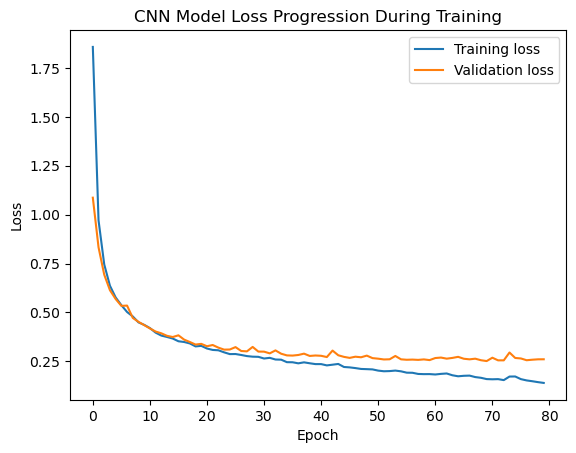

In [35]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("CNN Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

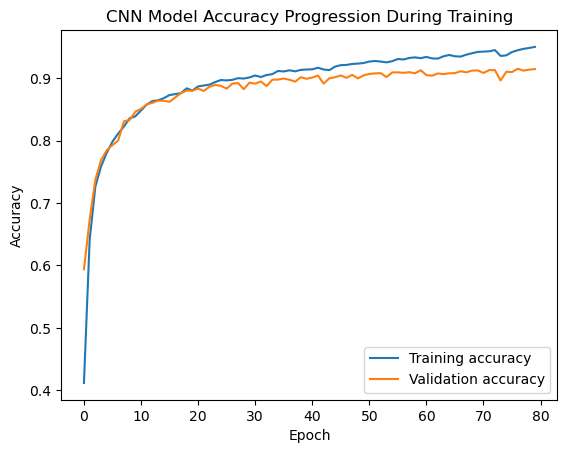

In [36]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("CNN Model Accuracy Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

## Model Evaluation

Using TensorFlow's `evaluate` function we get an accuracy of nearly 91% for our model. This is a neat performance, considering that our model is rather simple, being shallow and ignoring a bit of overfitting.

The confusion matrix for our model's predictions also has the majority of values in the main diagonal, indicating a good performance. Note that the mistakes are concentrated in some specific classes, like class 0 (t-shirt) that gets misclassified as class 6 (shirt) a lot of times. This is understandable, since both objects are quite similar and the images do not have much details to help differentiate them.

모델 평가

TensorFlow의 evaluate 함수를 사용한 결과, 우리 모델의 정확도는 거의 91%에 달합니다. 이는 모델이 상대적으로 간단하고 얕으며 약간의 오버피팅을 무시하고 있다는 점을 고려할 때 괜찮은 성능입니다.

모델의 예측에 대한 혼동 행렬(confusion matrix)에서도 대부분의 값이 주 대각선(main diagonal)에 집중되어 있어 좋은 성능을 나타냅니다. 잘못 분류된 경우는 특정 클래스에 집중되어 있으며, 예를 들어 클래스 0(티셔츠)이 클래스 6(셔츠)로 많이 잘못 분류됩니다. 이는 두 객체가 상당히 유사하고 이미지에 그들을 구별하는 데 도움이 되는 세부 정보가 많지 않기 때문에 이해할 수 있습니다.

In [37]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9129 - loss: 0.2533


[0.24675478041172028, 0.9161999821662903]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


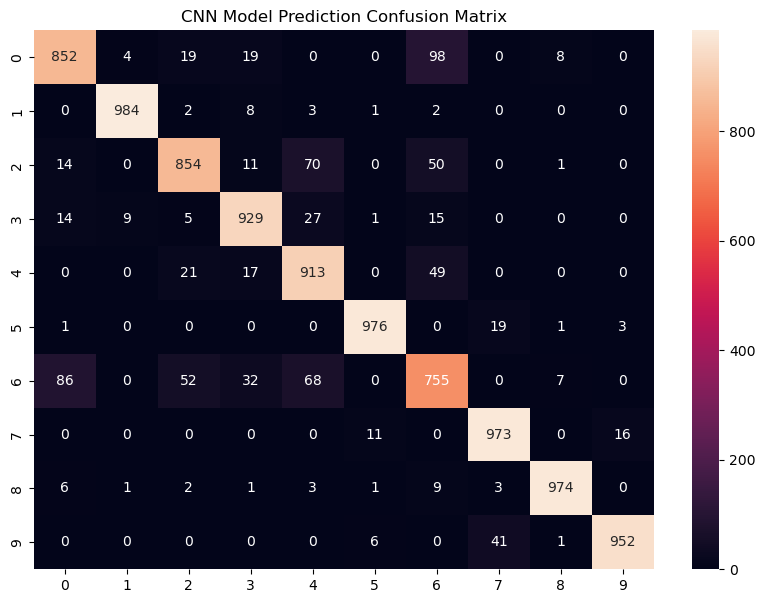

In [38]:
y_pred = cnn_model.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("CNN Model Prediction Confusion Matrix")
plt.show()

Sklearn's `classification_report` reassures our previous conclusions. Overall accuracy is at 91%. Class 6 has a low F1-score, for being a false positive for class 0 too much.

For last, we have another image grid with random images from the dataset. This time, we print the actual label and the predicted label for each image. We can see the mistakes described by the confusion matrix in line 14, column 5 and line 14, column 8.

We can also see how much class 0 (t-shirt) and class 6 (shirt) look alike. Another class with low recall is class 2 (pullover) and it is also very similar to classes 0 and 6. Low recall means many false negatives, i.e., class 2 is commonly said to be class 0 or 6.

Our CNN model was not able to capture features well enough to distinguish the similar classes.

Sklearn의 classification_report는 우리가 이전에 도출한 결론을 확증해줍니다. 전체 정확도는 91%이며, 클래스 6은 클래스 0에 대한 잘못된 긍정(false positive) 때문에 낮은 F1 점수를 기록하고 있습니다.

마지막으로, 데이터셋의 무작위 이미지로 구성된 또 다른 이미지 그리드를 보여드립니다. 이번에는 각 이미지에 대해 실제 레이블과 예측된 레이블을 출력합니다. 혼동 행렬에서 설명한 오류는 14행 5열과 14행 8열에서 확인할 수 있습니다.

클래스 0(티셔츠)와 클래스 6(셔츠)은 얼마나 유사하게 보이는지도 확인할 수 있습니다. 낮은 리콜(recall)을 보이는 또 다른 클래스는 클래스 2(풀오버)이며, 이 클래스도 클래스 0과 6과 매우 유사합니다. 낮은 리콜은 많은 거짓 부정(false negatives)을 의미하며, 즉 클래스 2가 일반적으로 클래스 0 또는 6으로 잘못 분류된다는 것을 나타냅니다.

우리의 CNN 모델은 유사한 클래스들을 구별하기에 충분히 특징을 잘 포착하지 못했습니다.

In [39]:
class_names = ["Class 0 => T-shirt",
            "Class 1 => Trouser",
            "Class 2 => Pullover",
            "Class 3 => Dress",
            "Class 4 => Coat",
            "Class 5 => Sandal",
            "Class 6 => Shirt",
            "Class 7 => Sneaker",
            "Class 8 => Bag",
            "Class 9 => Ankle boot"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                       precision    recall  f1-score   support

   Class 0 => T-shirt       0.88      0.85      0.86      1000
   Class 1 => Trouser       0.99      0.98      0.98      1000
  Class 2 => Pullover       0.89      0.85      0.87      1000
     Class 3 => Dress       0.91      0.93      0.92      1000
      Class 4 => Coat       0.84      0.91      0.88      1000
    Class 5 => Sandal       0.98      0.98      0.98      1000
     Class 6 => Shirt       0.77      0.76      0.76      1000
   Class 7 => Sneaker       0.94      0.97      0.96      1000
       Class 8 => Bag       0.98      0.97      0.98      1000
Class 9 => Ankle boot       0.98      0.95      0.97      1000

             accuracy                           0.92     10000
            macro avg       0.92      0.92      0.92     10000
         weighted avg       0.92      0.92      0.92     10000



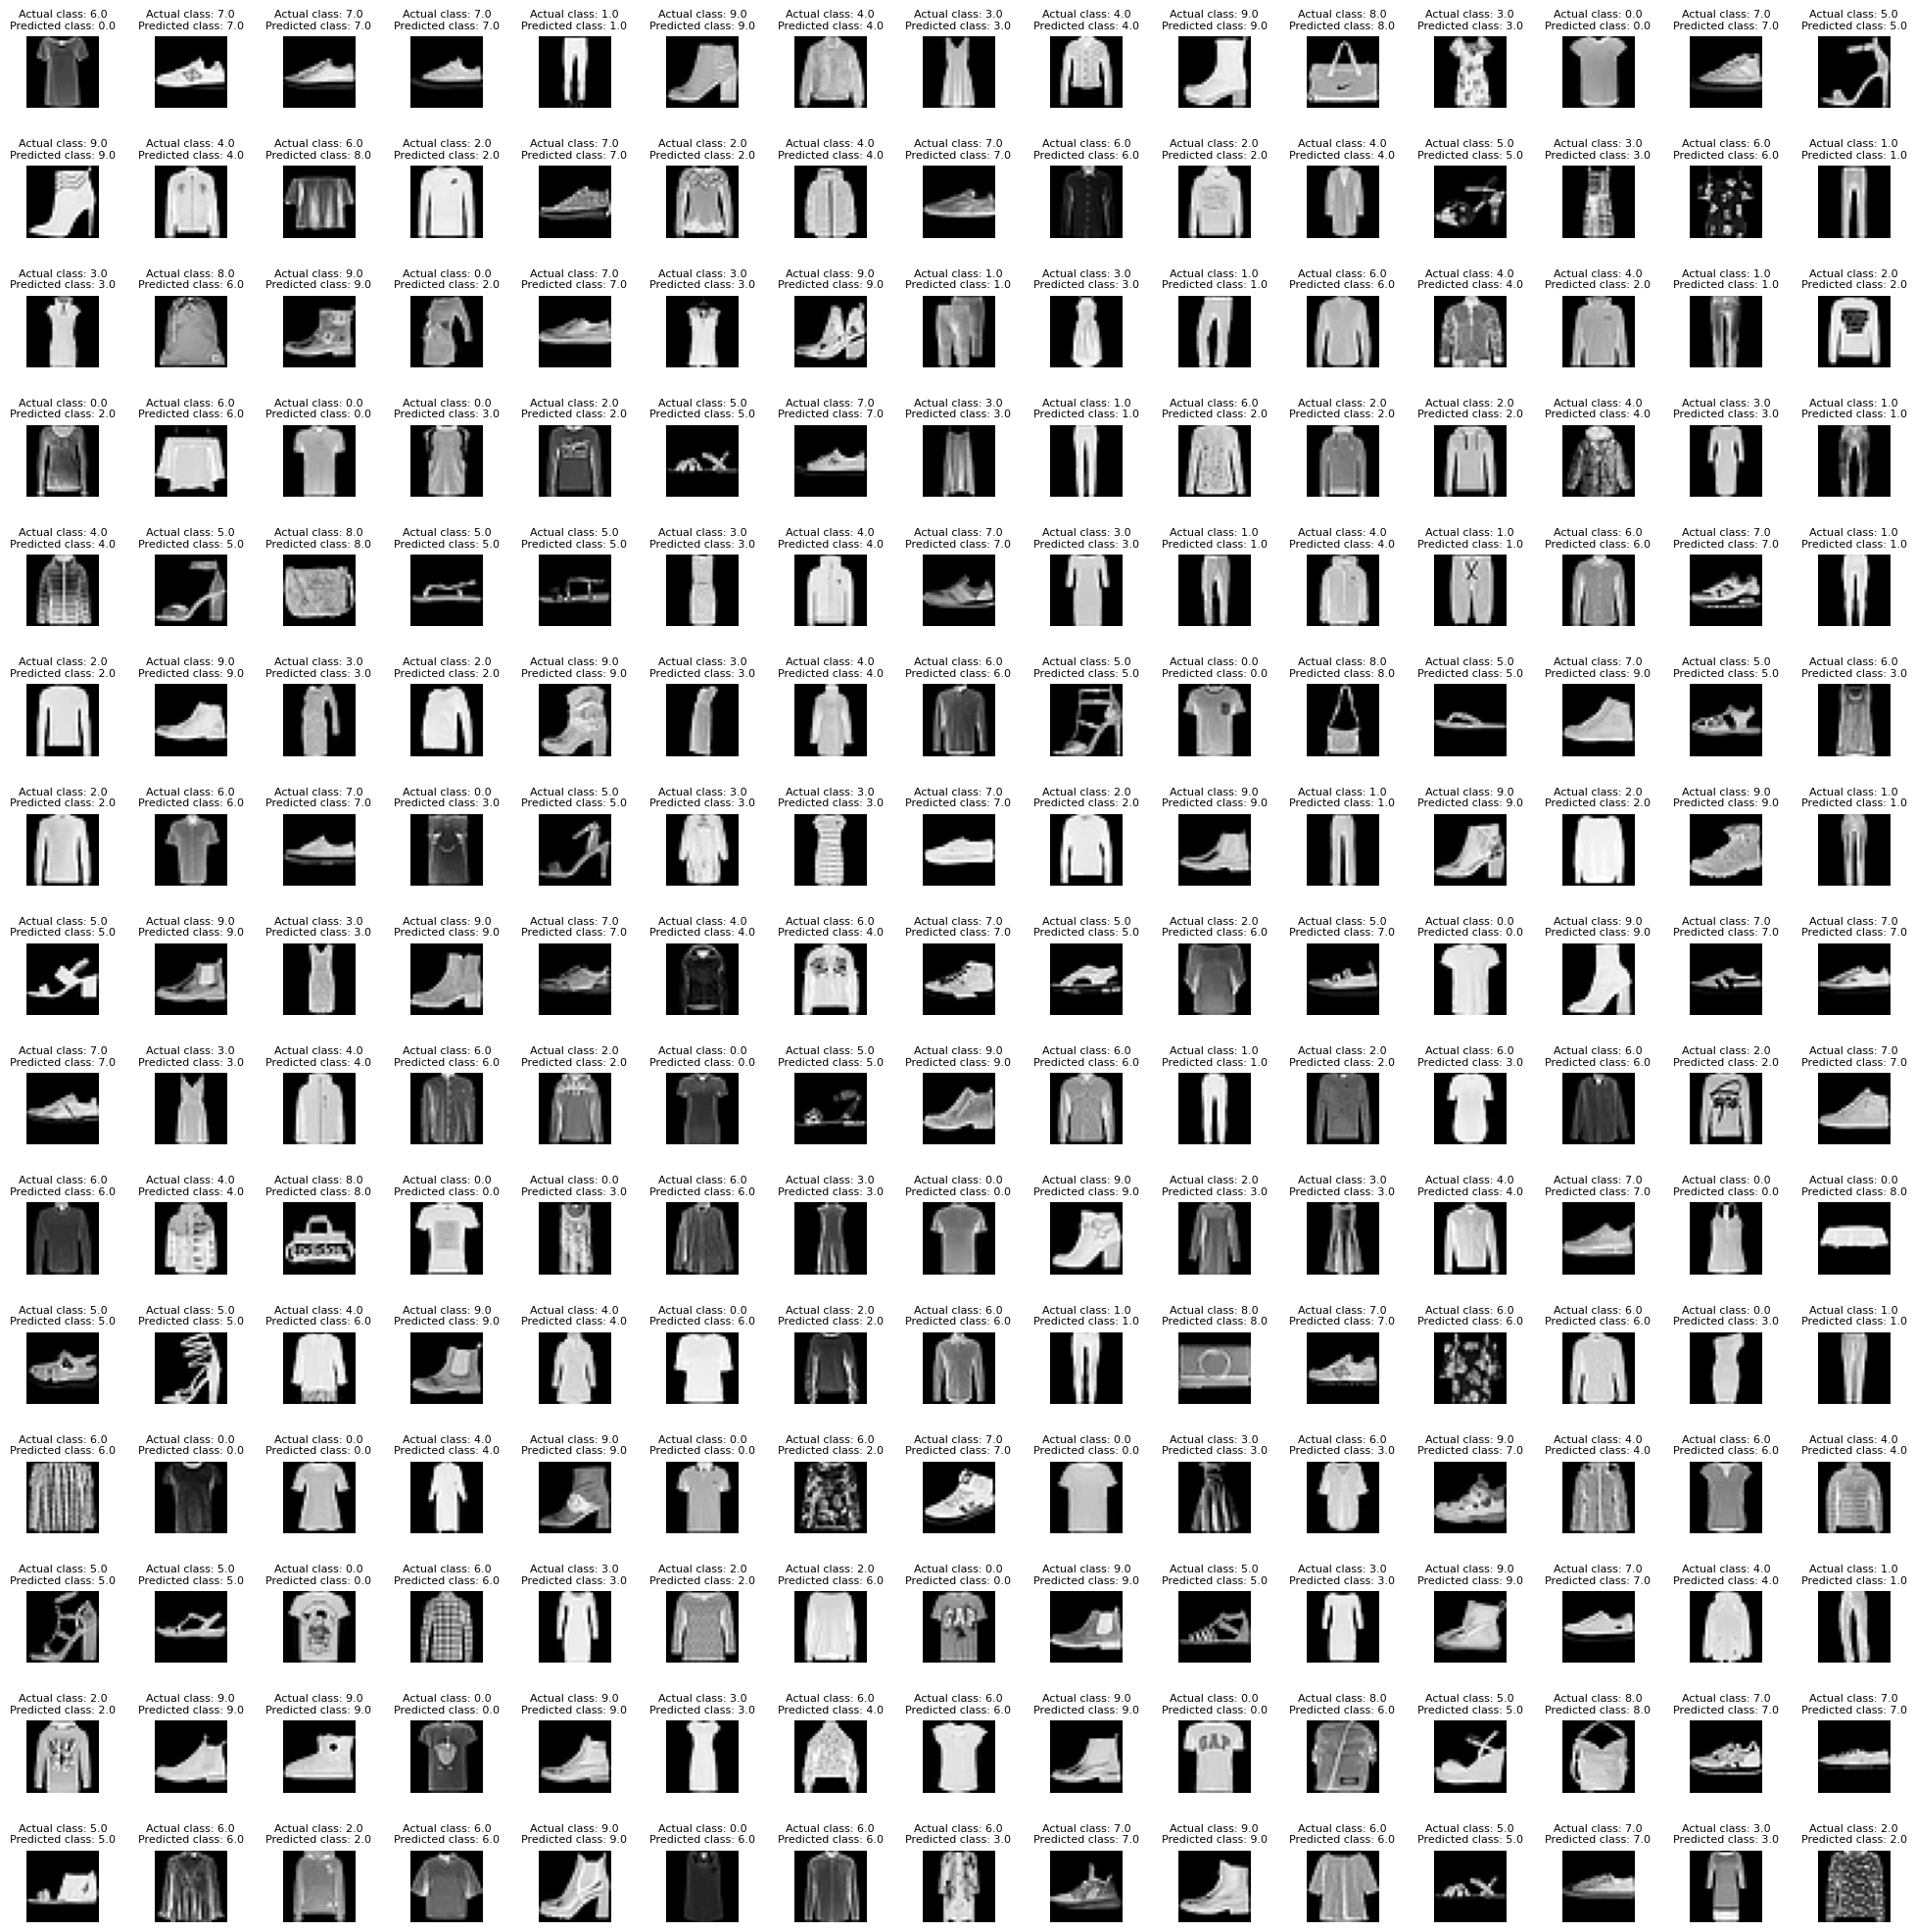

In [40]:
# Grid dimensions.
grid_height = 15
grid_width = 15

fig, axes = plt.subplots(grid_height, grid_width, figsize=(25, 25))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    # Draft random index to plot random image.
    drafted_image = np.random.randint(0, X_test.shape[0])
    axes[i].imshow(X_test[drafted_image].reshape(28, 28), cmap='gray')
    # Print actual and predicted labels for image.
    axes[i].set_title("Actual class: {:0.1f}\nPredicted class: {:0.1f}".format(
        y_test[drafted_image], y_pred_classes[drafted_image]), fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.8)

Epoch [1/5] - Train Loss: 0.6709, Test Loss: 0.4903, Test Accuracy: 82.74%
Epoch [2/5] - Train Loss: 0.4195, Test Loss: 0.4000, Test Accuracy: 85.45%
Epoch [3/5] - Train Loss: 0.3640, Test Loss: 0.3901, Test Accuracy: 85.91%
Epoch [4/5] - Train Loss: 0.3366, Test Loss: 0.3609, Test Accuracy: 86.80%
Epoch [5/5] - Train Loss: 0.3160, Test Loss: 0.3394, Test Accuracy: 87.54%

Training Losses: [0.6708626606062785, 0.4194749309532424, 0.36402086351217744, 0.3366485056020558, 0.31599584408501574]
Test Losses: [0.490341743850708, 0.3999901749134064, 0.39007556878328326, 0.36093536845445634, 0.33939507660865786]
Accuracies: [82.74, 85.45, 85.91, 86.8, 87.54]


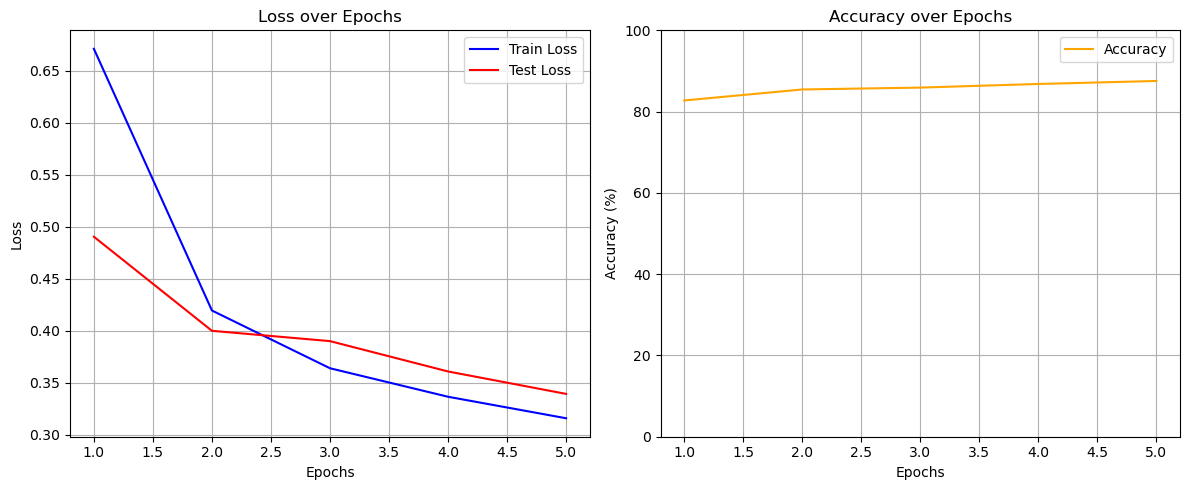

In [43]:
import zipfile
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from keras import callbacks  # Keras에서 필요한 콜백

# Fashion MNIST 데이터셋 압축 해제
# Extract training set from FashionMNIST dataset.
zip_object = zipfile.ZipFile('data/raw/fashion-mnist-train.zip')
zip_object.extractall('data/raw/')
zip_object.close()

# Extract testing set from FashionMNIST dataset.
zip_object = zipfile.ZipFile('data/raw/fashion-mnist-test.zip')
zip_object.extractall('data/raw/')
zip_object.close()

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 변환 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Fashion MNIST 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='data/', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='data/', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), 28, 28)  # (batch_size, seq_len, input_size)
        out, _ = self.lstm(x)  # LSTM 처리
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스의 출력
        return out

# 모델, 손실 함수 및 옵티마이저 설정
cnn_model = LSTMModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# EarlyStopping 콜백 설정
early_stopping_callback = callbacks.EarlyStopping(patience=10)

# 손실과 정확도를 기록할 리스트 초기화
train_losses = []
test_losses = []
accuracies = []

# 훈련 및 평가 함수 정의
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)  # 예측
        loss = criterion(output, target)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)  # 평균 손실 반환
    return average_loss

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)  
            # 배치 손실 합산
            pred = output.argmax(dim=1, keepdim=True)  
            # 가장 높은 값을 가진 클래스 선택
            correct += pred.eq(target.view_as(pred)).sum().item()

    average_loss = test_loss / len(test_loader.dataset)  # 평균 손실 계산
    accuracy = 100. * correct / len(test_loader.dataset)  # 정확도 계산
    return average_loss, accuracy  # 손실과 정확도 반환

# 모델 훈련 및 평가 실행
num_epochs = 5
for epoch in range(1, num_epochs + 1):
    train_loss = train(cnn_model, device, train_loader, optimizer, epoch)
    test_loss, accuracy = test(cnn_model, device, test_loader)

    # 손실과 정확도 기록
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)

    # 훈련 손실, 테스트 손실 및 정확도 출력
    print(f'Epoch [{epoch}/{num_epochs}] - '
        f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

# 훈련 손실, 테스트 손실, 정확도 리스트 출력
print("\nTraining Losses:", train_losses)
print("Test Losses:", test_losses)
print("Accuracies:", accuracies)

# 시각화 코드
# 결과 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Y축 범위 설정

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()  # 그래프 출력
